In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [53]:
data = pd.read_csv('survey.csv')

In [15]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [54]:
data = data.drop(data[~((data['Gender'] == 'Male') | (data['Gender'] == 'Female'))].index)

In [17]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN


In [55]:
data['Gender'] = data['Gender'].astype('category')

In [56]:
data.dtypes

Timestamp                      object
Age                             int64
Gender                       category
Country                        object
state                          object
self_employed                  object
family_history                 object
treatment                      object
work_interfere                 object
no_employees                   object
remote_work                    object
tech_company                   object
benefits                       object
care_options                   object
wellness_program               object
seek_help                      object
anonymity                      object
leave                          object
mental_health_consequence      object
phys_health_consequence        object
coworkers                      object
supervisor                     object
mental_health_interview        object
phys_health_interview          object
mental_vs_physical             object
obs_consequence                object
comments    

In [58]:
total = data.shape[0]

In [59]:
cat_cols = []
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    data.drop(data[col].isnull().index)
    dt = str(data[col].dtype)
    if null_count>0 and (dt=='object'):
        cat_cols.append(col)
        print(col + ' ' + str(null_count/total)) 

state 0.42527173913043476
self_employed 0.017663043478260868
work_interfere 0.20244565217391305
comments 0.8790760869565217


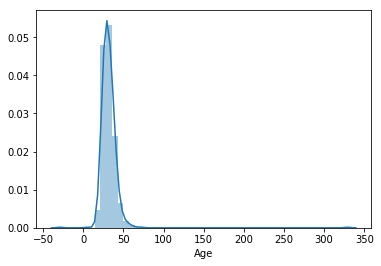

In [57]:
sns.distplot(data['Age'])

In [61]:
data = data.drop(data[(data['Age']>100) | (data['Age'] < 0)].index)

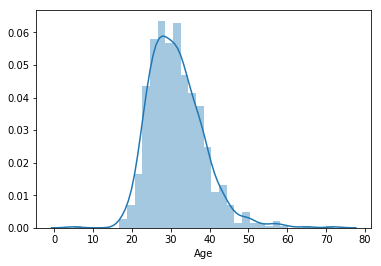

In [62]:
sns.distplot(data['Age'])

In [37]:
stand = StandardScaler()

In [39]:
minmax = MinMaxScaler()

/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


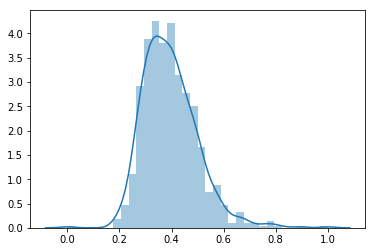

In [47]:
sns.distplot(minmax.fit_transform(data[['Age']]))

/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


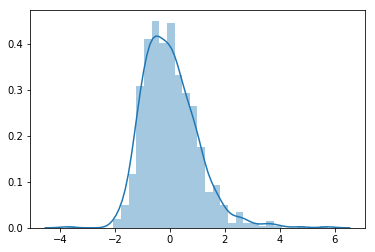

In [49]:
sns.distplot(stand.fit_transform(data[['Age']]))